## Citibike New York City Data Exploration and Visualization.

### Experience NYC in a whole new way
Citi Bike is the USA's largest bike share program, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town. This dataset will look at data from New York City in 2020.

In addition, I've compiled data for the weather in New York, for 2020. We will analyze both datsets and merge them, then draw our conclusions. I hope you enjoy this together with me. Have fun!

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

## Gathering and Assessing Data

In [2]:
# I only ran this once to append all the monthly data together.

#folder_name = 'Citibike-tripdata'
#files = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
#result = pd.concat(files, ignore_index=True)

# Let's see the shape and a sample.
#print(result.shape)
#result.sample(5)

(19506857, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1223914,1098,2020-01-31 16:49:37.6380,2020-01-31 17:07:56.4580,522,E 51 St & Lexington Ave,40.757148,-73.972078,529,W 42 St & 8 Ave,40.757570,-73.990985,29862,Subscriber,1977,1
15778561,465,2020-10-18 16:08:35.0450,2020-10-18 16:16:20.6820,3795,10 St & 2 Ave,40.671907,-73.993612,3354,3 St & Prospect Park West,40.668132,-73.973638,34772,Subscriber,1987,1
13392314,773,2020-09-18 16:55:54.6830,2020-09-18 17:08:48.6710,247,Perry St & Bleecker St,40.735354,-74.004831,466,W 25 St & 6 Ave,40.743954,-73.991449,16884,Customer,1969,0
3518690,859,2020-04-04 15:06:31.4950,2020-04-04 15:20:51.2130,3583,Eastern Pkwy & Washington Ave,40.671649,-73.963115,3041,Kingston Ave & Herkimer St,40.678907,-73.941428,41263,Customer,1983,2
12907161,479,2020-09-12 20:18:43.4290,2020-09-12 20:26:43.3240,325,E 19 St & 3 Ave,40.736245,-73.984738,334,W 20 St & 7 Ave,40.742388,-73.997262,44008,Subscriber,1995,1


In [3]:
# Let's save the appended files to a single .csv file.

#result.to_csv('citybike_trips_2020.csv', index=False)

In [2]:
# Let's import, copy and view the citybike_trips_2020 dataframe.
biketrips20 = pd.read_csv('citybike_trips_2020.csv')
biketrips20.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


## Column information
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station ID
- Start Station Name
- End Station ID
- End Station Name
- Stations Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Year of Birth
- Gender (Zero=unknown; 1=male; 2=female)

In [3]:
# Let's check our columns and the data types.
biketrips20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19506857 entries, 0 to 19506856
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 2.2+ GB


In [4]:
# Any Nulls?
biketrips20.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
# Any duplicates?
biketrips20.duplicated().sum()

0

In [6]:
# The gender column has 3 values, 0 being unknown. How many records are there of Male, Female and unknown?
biketrips20.gender.value_counts()

1    11798407
2     5551873
0     2156577
Name: gender, dtype: int64

In [7]:
# How about our usertype?
biketrips20.usertype.value_counts()

Subscriber    14955766
Customer       4551091
Name: usertype, dtype: int64

In [8]:
# Let's import and view the Weather dataframe
weather_import = pd.read_csv('NYWeather2020NVW.txt')
weather_import.head()

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in)
0,01/01/2020,3.39,15.9,0.01
1,02/01/2020,5.61,8.3,0.00
2,03/01/2020,8.17,4.9,0.05
3,04/01/2020,7.83,6.8,0.32
4,05/01/2020,3.44,20.2,0.01


In [9]:
# What do our columns look like? ** I did additional visual exploring using Excel for these files.
weather_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 365 non-null    object 
 1   Avg_Temp             365 non-null    float64
 2   Avg_Wind_Speed(mph)  365 non-null    float64
 3   Precipitation(in)    365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [10]:
# Any Nulls?
weather_import.isnull().sum()

Date                   0
Avg_Temp               0
Avg_Wind_Speed(mph)    0
Precipitation(in)      0
dtype: int64

# Cleaning Data

In [11]:
# Let's make a copy of the biketrips20 dataframe for cleaning purposes.

bt20 = biketrips20.copy()

# Remove records for unknown gender. We have a massive amount of records, so deleting these are justified.
bt20 = bt20[bt20['gender'] != 0]

#Change date columns to datetime format, change the id's into objects and usertype and gender as category type.
bt20['starttime'] = pd.to_datetime(bt20['starttime'])
bt20['stoptime'] = pd.to_datetime(bt20['stoptime'])

bt20['start station id'] = bt20['start station id'].astype('str')
bt20['end station id'] = bt20['end station id'].astype('str')
bt20['bikeid'] = bt20['bikeid'].astype('str')

bt20['usertype'] = bt20['usertype'].astype('category')
bt20['gender'] = bt20['gender'].astype('category')

# Let's have a look if that worked.
bt20.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17350280 entries, 0 to 19506855
Data columns (total 15 columns):
 #   Column                   Non-Null Count     Dtype         
---  ------                   --------------     -----         
 0   tripduration             17350280 non-null  int64         
 1   starttime                17350280 non-null  datetime64[ns]
 2   stoptime                 17350280 non-null  datetime64[ns]
 3   start station id         17350280 non-null  object        
 4   start station name       17350280 non-null  object        
 5   start station latitude   17350280 non-null  float64       
 6   start station longitude  17350280 non-null  float64       
 7   end station id           17350280 non-null  object        
 8   end station name         17350280 non-null  object        
 9   end station latitude     17350280 non-null  float64       
 10  end station longitude    17350280 non-null  float64       
 11  bikeid                   17350280 non-null  obje

In [12]:
# Let's add the new columns for the duration in minutes, the date in yyyy-mm-dd format, the hour of the day, 
# the day of the week and the month.These will help us analyze the data.

bt20['duration_mins'] = bt20['tripduration']/60

bt20['Date'] = bt20.starttime.dt.strftime('%Y-%m-%d')
bt20['hourofday'] = bt20.starttime.dt.strftime('%H')
bt20['dayofweek'] = bt20.starttime.dt.strftime('%A')
bt20['month'] = bt20.starttime.dt.strftime('%B')

# And let's take a look.
bt20.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_mins,Date,hourofday,dayofweek,month
0,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,13.150000,2020-01-01,00,Wednesday,January
1,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,25.683333,2020-01-01,00,Wednesday,January
2,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,24.400000,2020-01-01,00,Wednesday,January
3,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,9.866667,2020-01-01,00,Wednesday,January
4,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,11.700000,2020-01-01,00,Wednesday,January


In [13]:
# Now, let's make a copy of the weather_import dataframe for cleaning purposes.
weather = weather_import.copy()
weather.head()

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in)
0,01/01/2020,3.39,15.9,0.01
1,02/01/2020,5.61,8.3,0.00
2,03/01/2020,8.17,4.9,0.05
3,04/01/2020,7.83,6.8,0.32
4,05/01/2020,3.44,20.2,0.01


In [14]:
# checking the datatypes of the columns.
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 365 non-null    object 
 1   Avg_Temp             365 non-null    float64
 2   Avg_Wind_Speed(mph)  365 non-null    float64
 3   Precipitation(in)    365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [15]:
# I'm thinking about joining these two dataframes, let me take another look at the column types of bt20.
bt20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17350280 entries, 0 to 19506855
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         object        
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           object        
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   object        
 12  usertype                 category      
 13  birth year               int64         
 14  gender                   category      
 15  duration_mins            float64       
 16  Date                     object        
 17  hourofday                

In [16]:
# I'm changing this to datetime format.
weather['Date'] = pd.to_datetime(weather['Date'])

In [17]:
# Checking it's successful.
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    datetime64[ns]
 1   Avg_Temp             365 non-null    float64       
 2   Avg_Wind_Speed(mph)  365 non-null    float64       
 3   Precipitation(in)    365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [18]:
# Now changing it back again to object, so I can merge it.
weather['Date'] = weather['Date'].astype('str')

In [19]:
# The reason we did the above is to convert the Date into the same format on both tables.
# Now we can see that the date is exactly the same in both dataframes, so it'll merge correctly.
weather.head()

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in)
0,2020-01-01,3.39,15.9,0.01
1,2020-02-01,5.61,8.3,0.00
2,2020-03-01,8.17,4.9,0.05
3,2020-04-01,7.83,6.8,0.32
4,2020-05-01,3.44,20.2,0.01


In [20]:
# Now we'll merge, using an inner join, weather df first, so the merge should say ok, for day 1(2020-01-01), 
# we have Avg_temp of 3.39, Avg wind of 15.9 and precip of 0.01 in the weather df.
# For this day 1(2020-01-01), we also have the following rows from bt20, and copy across all rows for day 1(2020-01-01), 
# the values for Avg_temp of 3.39, Avg wind of 15.9 and precip of 0.01 would be duplicated for day 1 for all rows from bt20.

merged = pd.merge(weather, bt20)

In [21]:
# Let's take a look.
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17326549 entries, 0 to 17326548
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Date                     object        
 1   Avg_Temp                 float64       
 2   Avg_Wind_Speed(mph)      float64       
 3   Precipitation(in)        float64       
 4   tripduration             int64         
 5   starttime                datetime64[ns]
 6   stoptime                 datetime64[ns]
 7   start station id         object        
 8   start station name       object        
 9   start station latitude   float64       
 10  start station longitude  float64       
 11  end station id           object        
 12  end station name         object        
 13  end station latitude     float64       
 14  end station longitude    float64       
 15  bikeid                   object        
 16  usertype                 category      
 17  birth year               

In [22]:
merged.head()

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in),tripduration,starttime,stoptime,start station id,start station name,start station latitude,...,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_mins,hourofday,dayofweek,month
0,2020-01-01,3.39,15.9,0.01,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,...,40.714275,-73.989900,30326,Subscriber,1992,1,13.150000,00,Wednesday,January
1,2020-01-01,3.39,15.9,0.01,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,...,40.665147,-73.976376,17105,Customer,1969,1,25.683333,00,Wednesday,January
2,2020-01-01,3.39,15.9,0.01,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,...,40.701221,-74.012342,40177,Subscriber,1963,1,24.400000,00,Wednesday,January
3,2020-01-01,3.39,15.9,0.01,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,...,40.751551,-73.993934,27690,Subscriber,1980,1,9.866667,00,Wednesday,January
4,2020-01-01,3.39,15.9,0.01,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,...,40.683239,-73.965996,32583,Subscriber,1982,1,11.700000,00,Wednesday,January


In [23]:
# Let's change the date from our merged dataframe into a datetime format.
merged['Date'] = pd.to_datetime(merged['Date'])

In [24]:
# Let's take another look, using .sample().
merged.sample(10)

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in),tripduration,starttime,stoptime,start station id,start station name,start station latitude,...,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_mins,hourofday,dayofweek,month
7684748,2020-06-07,27.94,8.8,0.00,831,2020-06-07 12:44:40.758,2020-06-07 12:58:32.585,3163,Central Park West & W 68 St,40.773407,...,40.760301,-73.998842,41784,Subscriber,1988,1,13.850000,12,Sunday,June
11166058,2020-01-09,22.50,8.7,0.18,121,2020-01-09 17:48:12.153,2020-01-09 17:50:13.359,2006,Central Park S & 6 Ave,40.765909,...,40.763026,-73.972095,41490,Subscriber,1959,1,2.016667,17,Thursday,January
15893616,2020-11-21,10.67,13.6,0.00,323,2020-11-21 16:09:37.775,2020-11-21 16:15:01.648,3292,5 Ave & E 93 St,40.785785,...,40.772828,-73.966853,21313,Subscriber,1989,1,5.383333,16,Saturday,November
4212810,2020-04-22,6.83,18.8,0.33,1820,2020-04-22 15:44:13.297,2020-04-22 16:14:33.635,295,Pike St & E Broadway,40.714067,...,40.705693,-74.016777,43040,Subscriber,1978,2,30.333333,15,Wednesday,April
7688935,2020-06-07,27.94,8.8,0.00,1257,2020-06-07 13:27:29.474,2020-06-07 13:48:27.137,415,Pearl St & Hanover Square,40.704718,...,40.715338,-74.016584,37712,Subscriber,1990,2,20.950000,13,Sunday,June
8445644,2020-07-18,28.17,6.1,0.02,299,2020-07-18 02:15:08.385,2020-07-18 02:20:07.670,265,Stanton St & Chrystie St,40.722293,...,40.724947,-74.001659,15279,Customer,1996,1,4.983333,02,Saturday,July
2723488,2020-07-03,5.00,14.7,0.14,1031,2020-07-03 12:34:48.866,2020-07-03 12:51:59.933,480,W 53 St & 10 Ave,40.766697,...,40.761573,-73.972628,29050,Customer,1989,2,17.183333,12,Friday,July
9109667,2020-07-29,29.17,8.3,0.00,326,2020-07-29 10:18:54.545,2020-07-29 10:24:20.667,3737,Stanton St & Norfolk St,40.720747,...,40.718502,-73.983299,39720,Subscriber,1972,2,5.433333,10,Wednesday,July
15212357,2020-09-11,19.17,8.5,0.00,481,2020-09-11 10:39:08.629,2020-09-11 10:47:10.328,151,Cleveland Pl & Spring St,40.722104,...,40.723077,-73.985836,16165,Subscriber,1978,2,8.016667,10,Friday,September
4466796,2020-02-05,17.56,11.8,0.14,559,2020-02-05 20:47:36.086,2020-02-05 20:56:55.993,116,W 17 St & 8 Ave,40.741776,...,40.742869,-73.989186,17259,Subscriber,1972,1,9.316667,20,Wednesday,February


In [25]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17326549 entries, 0 to 17326548
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Date                     datetime64[ns]
 1   Avg_Temp                 float64       
 2   Avg_Wind_Speed(mph)      float64       
 3   Precipitation(in)        float64       
 4   tripduration             int64         
 5   starttime                datetime64[ns]
 6   stoptime                 datetime64[ns]
 7   start station id         object        
 8   start station name       object        
 9   start station latitude   float64       
 10  start station longitude  float64       
 11  end station id           object        
 12  end station name         object        
 13  end station latitude     float64       
 14  end station longitude    float64       
 15  bikeid                   object        
 16  usertype                 category      
 17  birth year               

In [26]:
# Let's add a new column calculating the riders' age from 'birth year'.
merged['age'] = 2020 - merged['birth year']

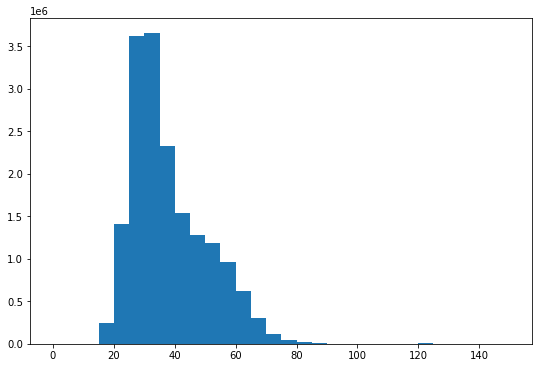

In [27]:
# Let's plot the distribution of the age column, visually examining our results for any outliers.

plt.figure(figsize=[9, 6])
bins = np.arange(0, merged['age'].max()+5, 5)
plt.hist(merged['age'].dropna(), bins=bins);

In [28]:
# Let's filter out the outlier ages, in this case I chose anyone above 75 y/o, as seen in the distribution above.
# Let's cast 'birth year' and 'age' to int type instead of float type.
merged = merged.query('age <= 75')
merged['birth year'] = merged['birth year'].astype('int')
merged['age'] = merged['age'].astype('int')

In [29]:
# Let's check our unique values.
merged.nunique()

Date                            365
Avg_Temp                        275
Avg_Wind_Speed(mph)             134
Precipitation(in)                61
tripduration                  33990
starttime                  17250428
stoptime                   17250159
start station id               1210
start station name             1222
start station latitude         1257
start station longitude        1244
end station id                 1245
end station name               1257
end station latitude           1293
end station longitude          1279
bikeid                        24974
usertype                          2
birth year                       60
gender                            2
duration_mins                 33990
hourofday                        24
dayofweek                         7
month                            12
age                              60
dtype: int64

In [30]:
# Importing random, setting random seed, so results can be replicated. The reason I'm doing this sample is so my results 
# are limited to 1 million rows, instead of the full dataset. I believe that 1 million rows will produce an adequate 
# representation for the purpose of this project. :)
np.random.seed(42)
merged_final = merged.sample(1000000)

In [31]:
merged_final.head()

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in),tripduration,starttime,stoptime,start station id,start station name,start station latitude,...,end station longitude,bikeid,usertype,birth year,gender,duration_mins,hourofday,dayofweek,month,age
16286744,2020-01-12,5.44,16.4,0.00,598,2020-01-12 10:27:51.398,2020-01-12 10:37:49.402,3147,E 85 St & 3 Ave,40.778012,...,-73.960940,41059,Subscriber,1964,1,9.966667,10,Sunday,January,56
16746485,2020-09-12,7.28,10.5,0.02,736,2020-09-12 18:55:31.546,2020-09-12 19:07:48.507,4073,W 51 St & Rockefeller Plaza,40.759700,...,-73.994156,15688,Subscriber,1951,1,12.266667,18,Saturday,September,69
3148492,2020-03-15,8.06,9.4,0.00,565,2020-03-15 10:53:20.261,2020-03-15 11:02:46.098,161,LaGuardia Pl & W 3 St,40.729170,...,-73.977688,41128,Subscriber,1988,1,9.416667,10,Sunday,March,32
13442322,2020-09-10,17.00,6.7,0.00,1241,2020-09-10 14:01:24.443,2020-09-10 14:22:05.471,83,Atlantic Ave & Fort Greene Pl,40.683826,...,-73.979453,46614,Subscriber,1987,2,20.683333,14,Thursday,September,33
1525838,2020-07-02,4.39,17.1,0.19,218,2020-07-02 16:05:13.246,2020-07-02 16:08:52.018,3609,Vernon Blvd & 31 Ave,40.769247,...,-73.930819,40182,Subscriber,1984,1,3.633333,16,Thursday,July,36


In [32]:
# Let's take a final look at our data shape.
merged_final.shape

(1000000, 24)

In [29]:
# We can save this file, so it's easier to access again, and not have to run through the steps again.
merged_final.to_csv('merged_final.csv', index=False)

## What is the structure of our dataset?

We've collected data for bike trips, and also weather for New York City for 2020, We've merged this, performed some wrangling and then retrieved a sample of 1,000,000 rows. I personally chose to take a sample because my dataset was so huge. 

The dataset could be broken down into the following groups of data:

- Trip duration (tripduration, starttime, stoptime)
- Bike Station Info (start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude)
- User info (bikeid, usertype, birth year, gender)
- Weather information (Avg_Temp, Avg_Wind_Speed(mph), Precipitation(in))
- Derived variables to assist our exploration (duration_mins, hourofday, dayofweek, month, age)


## What can we analyze? Which aspects could give us further insight into our data?

We were given the following example topics:
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?


Personally, I'm most interested in exploring the customer group types, individually, and see the behaviour adding the avg_temp as a variable, to see if there are any trends within certain weathers.

## What aspects of the dataset will help support our investigation into our features of interest?
We'll be using a lot of the variables. The date column, the duration columns, avg_temp column to name a few. All these will provide us useful info to analyze. We can group our data differently. Gender, usertype are a few examples. We can gain valuable insight when splitting this data and analyzing from different paradigms. 

# Univariate Exploration

In [33]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 16286744 to 3299892
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Date                     1000000 non-null  datetime64[ns]
 1   Avg_Temp                 1000000 non-null  float64       
 2   Avg_Wind_Speed(mph)      1000000 non-null  float64       
 3   Precipitation(in)        1000000 non-null  float64       
 4   tripduration             1000000 non-null  int64         
 5   starttime                1000000 non-null  datetime64[ns]
 6   stoptime                 1000000 non-null  datetime64[ns]
 7   start station id         1000000 non-null  object        
 8   start station name       1000000 non-null  object        
 9   start station latitude   1000000 non-null  float64       
 10  start station longitude  1000000 non-null  float64       
 11  end station id           1000000 non-null  object       

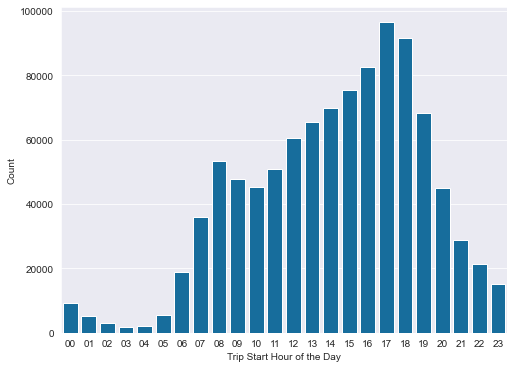

In [34]:
# Let's set our size, base_color and style.
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
# Converting hours into cat type so the graph is ordered.
hourday = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hourdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=hourday)
merged_final['hourofday'] = merged_final['hourofday'].astype(hourdaycat)

sb.countplot(data=merged_final, x='hourofday', color=base_color);
plt.xlabel('Trip Start Hour of the Day');
plt.ylabel('Count');

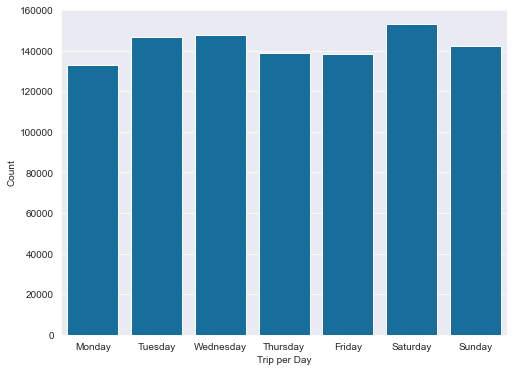

In [35]:
# Casting 'dayofweek' to category type.

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
merged_final['dayofweek'] = merged_final['dayofweek'].astype(weekdaycat)

sb.countplot(data=merged_final, x='dayofweek', color=base_color);
plt.xlabel('Trip per Day');
plt.ylabel('Count');

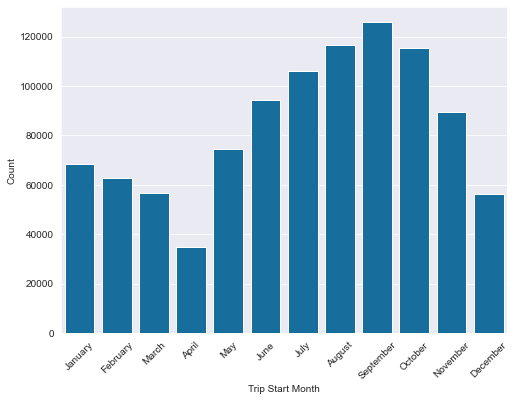

In [36]:
# Casting 'month' to category type.

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
merged_final['month'] = merged_final['month'].astype(monthcat)

sb.countplot(data=merged_final, x='month', color=base_color);
plt.xticks(rotation=45);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

Somewhat weird to see such a drop in April right? The data is correct and this is a reflection of Covid-19's impact on NYC's bike service.

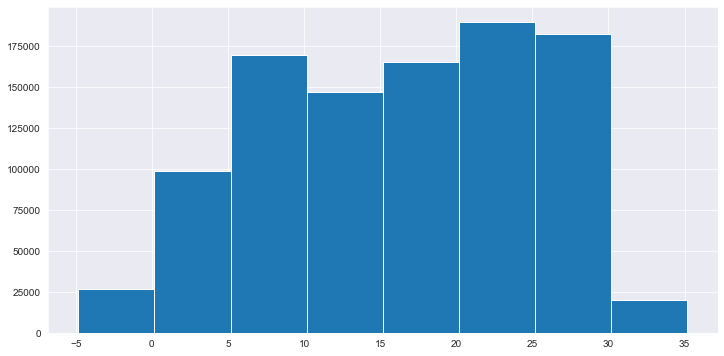

In [37]:
# Now let's see what avg_temperatures saw the highest trip counts. Remember that some users use this to go to work and 
# come back, they are also included in this but the temperature would probably not have a mayor influence on their decision
# to take a bike or not. Surely if it was raining heavily one day, they might have opted for the bus, but a 3-5 degreese
# difference is not likely to have changed their mind.
plt.figure(figsize=[12, 6])
bins = np.arange(merged_final['Avg_Temp'].min(), merged_final['Avg_Temp'].max()+5, 5)
plt.hist(merged_final['Avg_Temp'].dropna(), bins=bins);

In [38]:
merged_final.describe()

,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in),tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,duration_mins,age
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,16.286370,10.318260,0.104188,1.167016e+03,40.740659,-73.977477,40.740331,-73.977676,1982.712242,19.450263,37.287758
std,8.788715,3.687098,0.298516,1.104446e+04,0.034515,0.022671,0.034421,0.022704,11.933777,184.074319,11.933777
min,-4.830000,3.300000,0.000000,6.100000e+01,40.655400,-74.025353,40.655400,-74.066611,1945.000000,1.016667,16.000000
25%,8.830000,7.700000,0.000000,4.070000e+02,40.717548,-73.993929,40.717452,-73.993934,1975.000000,6.783333,28.000000
50%,16.940000,9.600000,0.000000,7.430000e+02,40.739713,-73.981854,40.739445,-73.981918,1986.000000,12.383333,34.000000
75%,23.940000,12.100000,0.040000,1.345000e+03,40.763505,-73.961651,40.763359,-73.961651,1992.000000,22.416667,45.000000
max,32.330000,23.600000,2.470000,3.786187e+06,40.852252,-73.884308,40.852252,-73.884308,2004.000000,63103.116667,75.000000


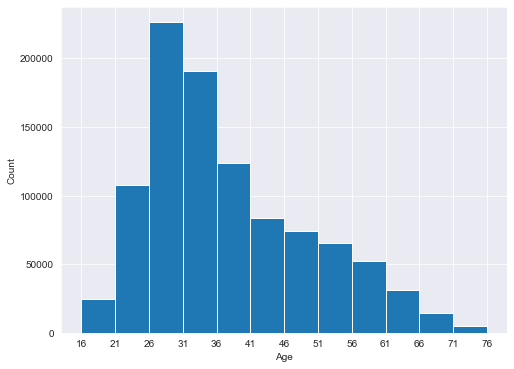

In [39]:
# Let's check ages.
bins = np.arange(merged_final['age'].min(), merged_final['age'].max()+5, 5)
plt.hist(data=merged_final, x='age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Age');
plt.ylabel('Count');

In [ ]:
# Now let's try durations_mins. How often does a trip usually take?

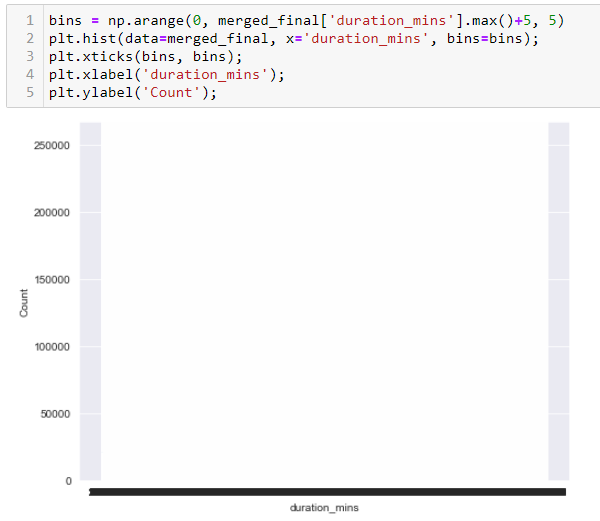

In [40]:
# LOL! I should have seen that one coming. I now see that the max value of duration_mins is 63103.116667. 
# The average is 19.450263 and 75% of the distribution is below 22.416667. SPOILER: The above graph took a while to 
# load, which is why I screenshotted the code and result and inserted it as an image instead.
# Let's take a look at what value 85% of the population falls under.
merged_final['duration_mins'].describe(percentiles=[.85])

count    1000000.000000
mean          19.450263
std          184.074319
min            1.016667
50%           12.383333
85%           29.100000
max        63103.116667
Name: duration_mins, dtype: float64

In [41]:
# How about 95%?
merged_final['duration_mins'].describe(percentiles=[.95])

count    1000000.000000
mean          19.450263
std          184.074319
min            1.016667
50%           12.383333
95%           42.116667
max        63103.116667
Name: duration_mins, dtype: float64

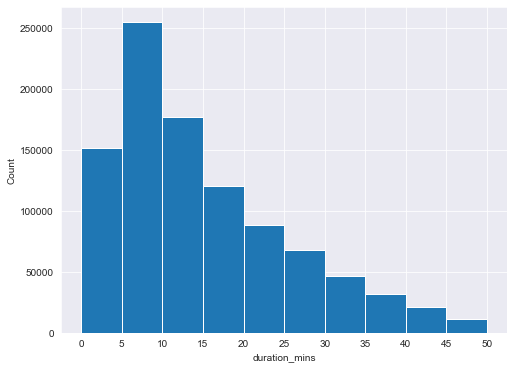

In [42]:
# Above we checked where the values of duration_mins lie. and 95% were within 42.116667 mins, so I chose my histogram below
# with bins of size 5, up to 50, being able to analyze the vast mayority of my data, with deeper precision.
bins = np.arange(0, 50+5, 5)
plt.hist(data=merged_final, x='duration_mins', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('duration_mins');
plt.ylabel('Count');

In [43]:
# Let's get rid of those with a duration of more than 60 mins.

merged_final = merged_final.query('duration_mins <= 60')
merged_final.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982934 entries, 16286744 to 3299892
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     982934 non-null  datetime64[ns]
 1   Avg_Temp                 982934 non-null  float64       
 2   Avg_Wind_Speed(mph)      982934 non-null  float64       
 3   Precipitation(in)        982934 non-null  float64       
 4   tripduration             982934 non-null  int64         
 5   starttime                982934 non-null  datetime64[ns]
 6   stoptime                 982934 non-null  datetime64[ns]
 7   start station id         982934 non-null  object        
 8   start station name       982934 non-null  object        
 9   start station latitude   982934 non-null  float64       
 10  start station longitude  982934 non-null  float64       
 11  end station id           982934 non-null  object        
 12  end stat

In [44]:
# Let me take a look at the gender colunmn. 
merged_final.gender.value_counts()

1    670138
2    312796
Name: gender, dtype: int64

In [45]:
# I want to have Male and Female, instead of the numbers in the gender column.
merged_final['gender'] = merged_final['gender'].astype('str')
merged_final['gender'].replace('2', 'Female',inplace=True)
merged_final['gender'].replace('1', 'Male',inplace=True)
merged_final['gender'] = merged_final['gender'].astype('category')

In [46]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982934 entries, 16286744 to 3299892
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     982934 non-null  datetime64[ns]
 1   Avg_Temp                 982934 non-null  float64       
 2   Avg_Wind_Speed(mph)      982934 non-null  float64       
 3   Precipitation(in)        982934 non-null  float64       
 4   tripduration             982934 non-null  int64         
 5   starttime                982934 non-null  datetime64[ns]
 6   stoptime                 982934 non-null  datetime64[ns]
 7   start station id         982934 non-null  object        
 8   start station name       982934 non-null  object        
 9   start station latitude   982934 non-null  float64       
 10  start station longitude  982934 non-null  float64       
 11  end station id           982934 non-null  object        
 12  end stat

In [47]:
merged_final.gender.value_counts()

Male      670138
Female    312796
Name: gender, dtype: int64

In [48]:
# save the clean data to a .csv file

merged_final.to_csv('merged_final_clean.csv', index=False)

# Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

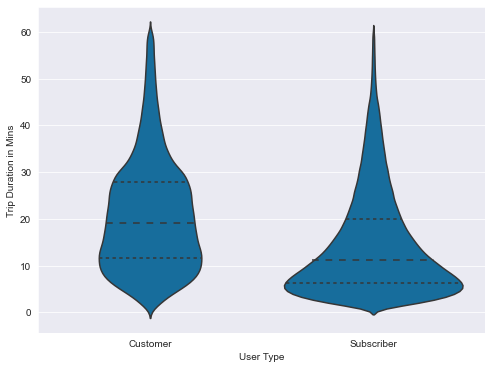

In [49]:
# I love the violin plots, so I wanted to start with one of these. Let's check the trip duration for both customers
# and subscribers.
sb.violinplot(data=merged_final, x='usertype', y='duration_mins', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Mins');

The trip duration distribution seems to indicate that customers take longer trips on average. Subscribers seem to use the bikes for shorter trips more often. The subscribers avg is sitting close to 10 mins, indicating usage to travel to and from work perhaps, while the customer's avg is almost at 20, indicating that they rent bikes with a view to enjoy the ride, rather than using it as a tool to get to and from work.


How does the trip duration distribution vary by gender?

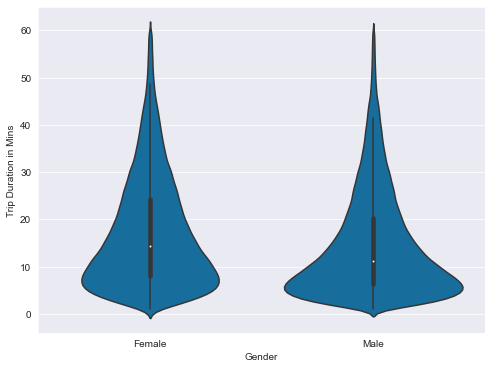

In [50]:
# Let's take a look.
sb.violinplot(data=merged_final, x='gender', y='duration_mins', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Mins');

Here we can see that male riders tend to have shorter trips compared to female riders, indicated by both a smaller median and shorter IQR, although the difference is fairly small.

Average Trip Duration on Weekdays

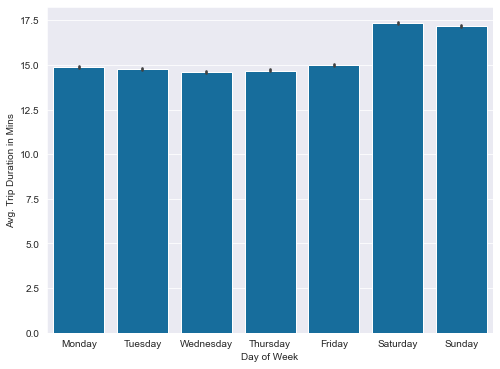

In [51]:
sb.barplot(data=merged_final, x='dayofweek', y='duration_mins', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Mins');

The Avg trips are shorter on Monday through Friday compared to weekends. This makes sense. In the weekend, people would have more available time to enjoy the ride and thus ride for longer.

Weekly usage between customers and subscribers

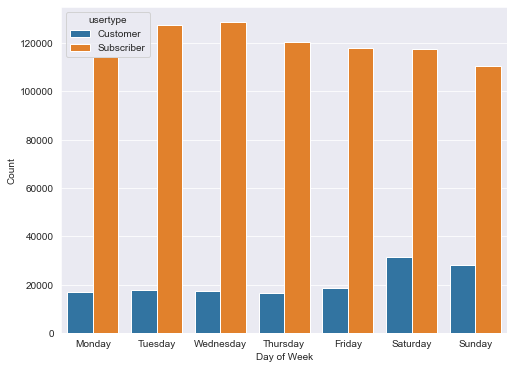

In [52]:
sb.countplot(data=merged_final, x='dayofweek', hue='usertype');
plt.xlabel('Day of Week');
plt.ylabel('Count');

In general, we can see that there are more subscribers than customers. We can also see that while customer usage tends to go up on the weekend, subscriber usage tends to go down. The drop of volume on weekends for subscribers indicates that they primarily ride bikes to and from work during work days, whereas the opposite pattern for customers on weekends demonstrates that the use was more relaxed and enjoyed.

Daily usage between customers and subscribers

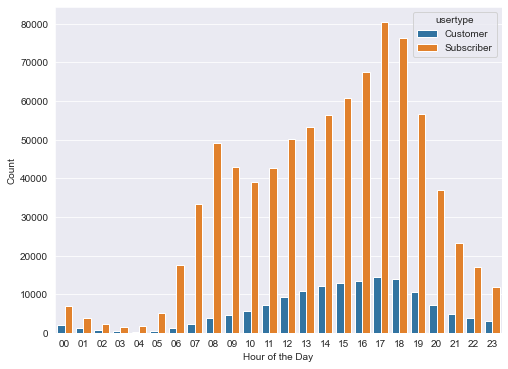

In [53]:
sb.countplot(data=merged_final, x='hourofday', hue='usertype');
plt.xlabel('Hour of the Day');
plt.ylabel('Count');

Analyzing the subscribers user type, we see two peaks, one in the morning around 8 and one in the evening around 17:00. This seems to confirm our theory that subscribers tend to use this as a tool to go and come from work.

Checking the Customer user type, we see that there isn't really a peak, it's more a curve, and the highest point is around 17:00. This confirms the usage is more a leasure type as it's spread out more evenly.

Monthly usage between customers and subscribers

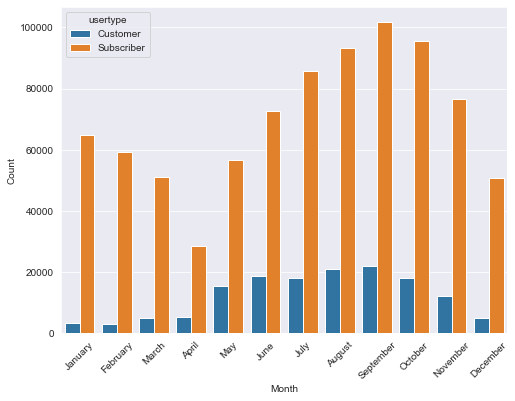

In [54]:
sb.countplot(data=merged_final, x='month', hue='usertype');
plt.xticks(rotation=45);
plt.xlabel('Month');
plt.ylabel('Count');

We can see that going from Jan to April there was a decrease in usage for the subscribers, this could have been as a result of the Covid-19 pandemic. After this it went up and peaked for both groups in September. The weather could have influenced on this, which we'll analyze later.

Users age between customers and subscribers

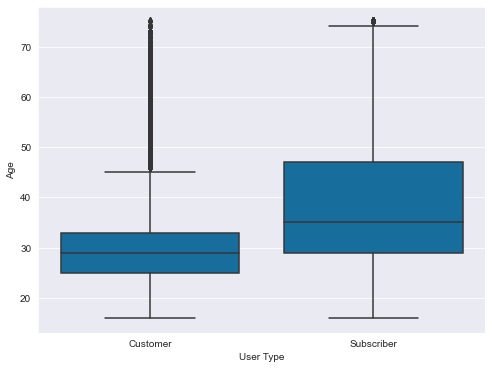

In [55]:
sb.boxplot(data=merged_final, x='usertype', y='age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Age');

We can see that the subscribers group is slightly older and the ages also vary more in this group. The customers tend to be younger and the age difference varies less.

Let's take a look at temperature.

In [56]:
merged_final.Avg_Temp.describe()

count    982934.000000
mean         16.259518
std           8.795074
min          -4.830000
25%           8.780000
50%          16.940000
75%          23.940000
max          32.330000
Name: Avg_Temp, dtype: float64

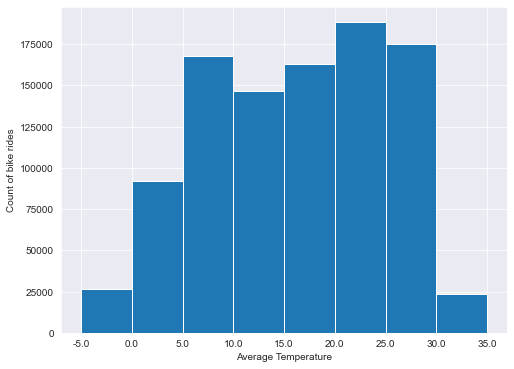

In [57]:
bins = np.arange(-5, merged_final['Avg_Temp'].max()+5, 5)
plt.hist(data=merged_final, x='Avg_Temp', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Average Temperature');
plt.ylabel('Count of bike rides');

Not much to see here, let's split it into groups. One for Customer, using the bikes for 24 h or less, and another for the anual members, subscribers.

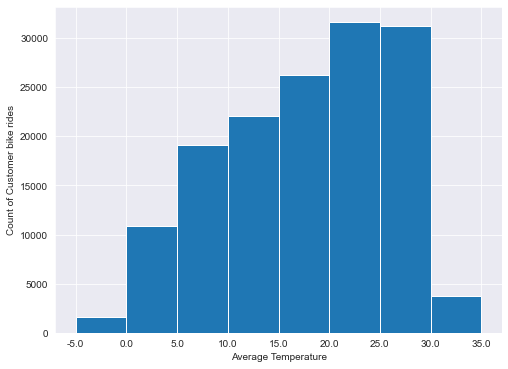

In [58]:
customers = merged_final.query('usertype == "Customer"')
bins = np.arange(-5, customers['Avg_Temp'].max()+5, 5)
plt.hist(data=customers, x='Avg_Temp', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Average Temperature');
plt.ylabel('Count of Customer bike rides');


Interestingly, it seems that Customers have a preference in temperature. The hotter it is, the more likely they are to hire a bike. The last column, values from 30.0 to 35.0 is lower, possibly due to the fact it just doesn't get that hot in NYC as it does here in Spain.

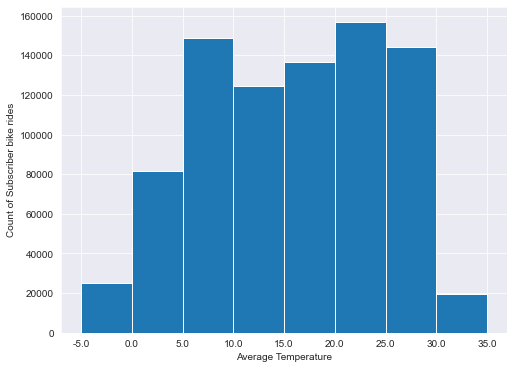

In [59]:
subscribers = merged_final.query('usertype == "Subscriber"')
bins = np.arange(-5, subscribers['Avg_Temp'].max()+5, 5)
plt.hist(data=subscribers, x='Avg_Temp', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Average Temperature');
plt.ylabel('Count of Subscriber bike rides');


On the Subscribers front, which we said were anual members, and tend to use the bike to go to and from work, they seem to mind less about temperature, as seen by the wider distribution.

In [60]:
# Let me just confirm how many records were available for the bins.
bins = np.arange(-5, customers['Avg_Temp'].max()+5, 5)
merged_final.Avg_Temp.value_counts(ascending=True, bins=bins)


(30.0, 35.0]      19843
(-5.001, 0.0]     26845
(0.0, 5.0]        97098
(10.0, 15.0]     145219
(5.0, 10.0]      164103
(15.0, 20.0]     164929
(25.0, 30.0]     178849
(20.0, 25.0]     186048
Name: Avg_Temp, dtype: int64

Indeed, as seen, the count of values from 30.0 to 35.0 is only 19843, therefore it's a smaller bar relative to the others next to it.



### What did we see so far?
We saw there were more subscribers than customers overall. We saw the subscribers used this to travel to and from work, where the customers used this throughout the day, more for leasure purposes. More trips were recorded on weekdays vs weekends for subscribers, also you could clearly see two peak hour patterns in the data. We saw these people were also slightly older on average. We also explored and saw they rode bikes in very diverse weathers.

For the Customers, these were on average slightly younger and we saw a clear correlation between rides and temperature in this group. The higher the temperature, the more people chose to ride a bike.

### Anything else?
There was a slight decrease in usage from the customer group in July, and for both groups the peak usage was in September. I expected this to be some time in July or August. I guess this could be influenced by Covid-19, as restrictions were being eased and people were more likely to go out and rent a bike. There isn't enough data here to confirm or deny that, though. It's just a thought.

# Multivariate Exploration
How does the average trip duration vary in weekdays between customers and subscribers?

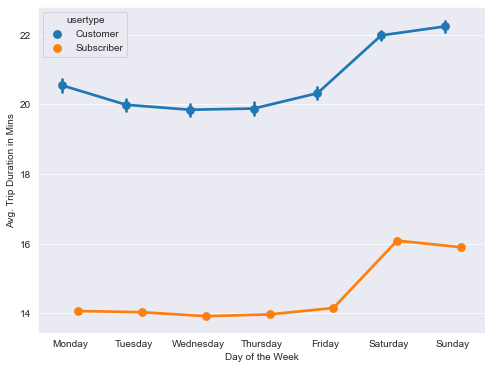

In [61]:
sb.pointplot(data=merged_final, x='dayofweek', y='duration_mins', hue='usertype', dodge=0.25);
plt.xlabel('Day of the Week');
plt.ylabel('Avg. Trip Duration in Mins');

Subscribers tend to take shorter trips than customers. This makes sense, your morning trip to work on a bike is supposed to be quick and effective, not long and enjoyable. :)

Both groups have an increase on the weekend vs the weekdays.
The Customer group takes longer trips on average than the Subscribers. 

How does the hourly usage vary during weekdays for customers and subscribers?

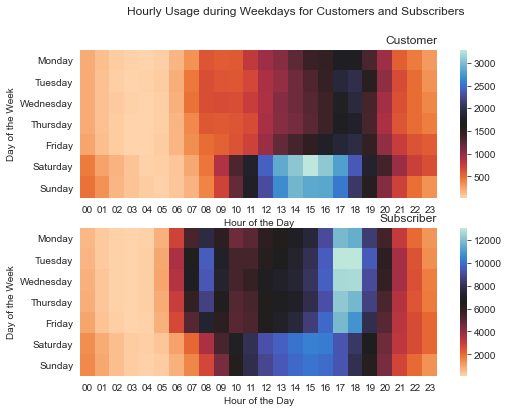

In [62]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = merged_final.query('usertype == "Customer"')
ct_counts = customers.groupby(['dayofweek', 'hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(ct_counts, cmap='icefire_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

plt.subplot(2, 1, 2)
subscribers = merged_final.query('usertype == "Subscriber"')
st_counts = subscribers.groupby(['dayofweek', 'hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(st_counts, cmap='icefire_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

The heatmaps on the top shows our peak being on the weekend overall.<br>
The bottom one shows that our peaks are in the weekdays and also at the same times, morning and evening.<br>
The different patterns between the two is rather obvious.

In [ ]:
# Now I am going to split data for the temperature into buckets, using the help from the link below.
# https://www.codeforests.com/2020/08/30/pandas-split-data-into-buckets/

In [63]:
merged_final['how_cold'] = pd.cut(merged_final['Avg_Temp'], 5, labels=['very_cold', 'cold', 'normal', 'hot', 'very_hot'])

In [64]:
# Let's check that.
merged_final.head()

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in),tripduration,starttime,stoptime,start station id,start station name,start station latitude,...,bikeid,usertype,birth year,gender,duration_mins,hourofday,dayofweek,month,age,how_cold
16286744,2020-01-12,5.44,16.4,0.00,598,2020-01-12 10:27:51.398,2020-01-12 10:37:49.402,3147,E 85 St & 3 Ave,40.778012,...,41059,Subscriber,1964,Male,9.966667,10,Sunday,January,56,cold
16746485,2020-09-12,7.28,10.5,0.02,736,2020-09-12 18:55:31.546,2020-09-12 19:07:48.507,4073,W 51 St & Rockefeller Plaza,40.759700,...,15688,Subscriber,1951,Male,12.266667,18,Saturday,September,69,cold
3148492,2020-03-15,8.06,9.4,0.00,565,2020-03-15 10:53:20.261,2020-03-15 11:02:46.098,161,LaGuardia Pl & W 3 St,40.729170,...,41128,Subscriber,1988,Male,9.416667,10,Sunday,March,32,cold
13442322,2020-09-10,17.00,6.7,0.00,1241,2020-09-10 14:01:24.443,2020-09-10 14:22:05.471,83,Atlantic Ave & Fort Greene Pl,40.683826,...,46614,Subscriber,1987,Female,20.683333,14,Thursday,September,33,normal
1525838,2020-07-02,4.39,17.1,0.19,218,2020-07-02 16:05:13.246,2020-07-02 16:08:52.018,3609,Vernon Blvd & 31 Ave,40.769247,...,40182,Subscriber,1984,Male,3.633333,16,Thursday,July,36,cold


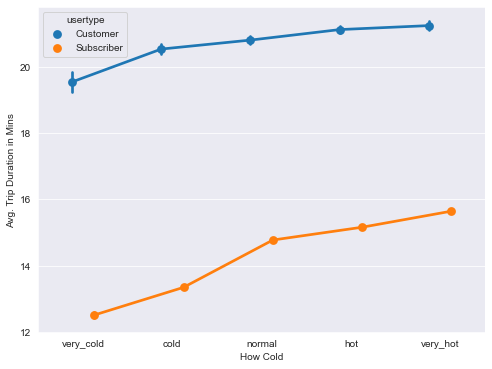

In [67]:
# Now I can plot this properly.
sb.pointplot(data=merged_final, x='how_cold', y='duration_mins', hue='usertype', dodge=0.25);
plt.xlabel('How Cold');
plt.ylabel('Avg. Trip Duration in Mins');

Here we can clearly see that temperature influences the lenght that users will use the bike for, being longer for both user types the hotter it gets, and considerably more so for the Subscriber type.

## What did we learn after all the above observations?
I think it's safe to say that weather or temperature plays a role in our bike dataframe.
People tend to bike more when the weather is 20 degrees or more, especially those who rent bikes for 24 hours. This seemed to confirm what we had been finding along our other previous explorations.
In general, there are more Subscribers than Customers. Subscribers have a clear pattern of using this for work commute.
Customers seem to rent bikes when the weather is warmer. They also take longer on their bike rides.
Our heatmap provided great insight as to when each group tends to use our services.